# Support Vector Machines

## IRIS data set
> - **label**: species   
> - **features**: sepal_length, sepal_width, petal_length, petal_width

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Make it binary
data=iris[iris['species']!='virginica']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = data[['sepal_width','petal_width']]
y = data['species']
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)
print(Xtrain.shape)
print(Xtest.shape)

(75, 2)
(25, 2)


## Estimation

In [5]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear',C=10)
svc1.fit(Xtrain,ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
ypred = svc1.predict(Xtest)
ypred[:10]

array(['versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [7]:
svc1.support_vectors_

array([[2.3, 0.3],
       [3.5, 0.6],
       [2.7, 1. ]])

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[16,  0],
       [ 0,  9]])

## Data Visualization

In [9]:
from sklearn.preprocessing import LabelEncoder
y1 = LabelEncoder().fit_transform(ytrain)
y1

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0])

In [10]:
# Create grid to evaluate model

import numpy as np
xx     = np.linspace(2, 5, 100)   #(100,)
yy     = np.linspace(0, 2, 100)   #(100,)
YY, XX = np.meshgrid(yy, xx)      #(100,100) and (100,100) Replicate the data

xy     = np.vstack([XX.ravel(), YY.ravel()]).T         # (10000,2)
Z      = svc1.decision_function(xy).reshape(XX.shape)  #(100,100)

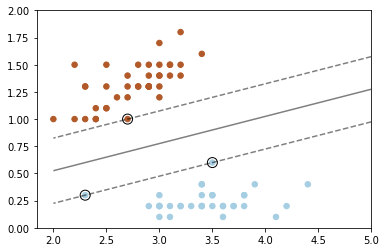

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain['sepal_width'], Xtrain['petal_width'], c=y1, 
            s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k');

## Nonlinear Kernel

In [12]:
from sklearn.svm import SVC
svc2 = SVC(kernel='poly', degree=2, gamma='auto')
svc2.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
ypred = svc2.predict(Xtest)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)

array([[16,  0],
       [ 0,  9]])

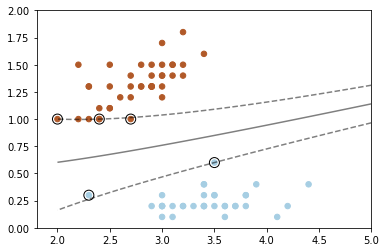

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain['sepal_width'], Xtrain['petal_width'], c=y1, 
            s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(2, 5, 100)
yy = np.linspace(0, 2, 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Activity 1
> Use the simulation data below to create linear classifier.  
> Plot the figure like above.  

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

from sklearn.svm import SVC
svc3 = SVC(kernel='linear',C=10)
svc3.fit(Xtrain,ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
Xtrain[:,0].max()

3.1851579396666305

In [20]:
ypred = svc3.predict(Xtest)
ypred[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [21]:
svc3.support_vectors_

array([[2.33812285, 3.43116792],
       [0.44359863, 3.11530945],
       [2.06156753, 1.96918596]])

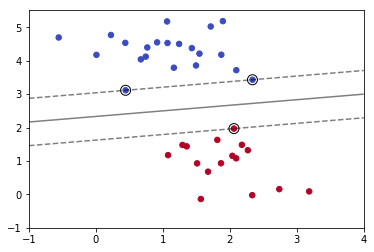

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, 
            s=30, cmap='coolwarm')

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(-1, 4, 50)
yy = np.linspace(-1, 5, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc3.support_vectors_[:, 0], svc3.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k');

## Activity 2
> Use the simulation data below to create nonlinear classifier.  
> Plot the figure like above.  

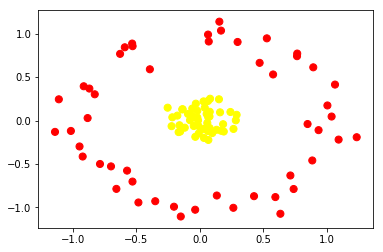

In [23]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

from sklearn.svm import SVC
svc4 = SVC(kernel='poly',degree=2,gamma='scale',C=10)
svc4.fit(Xtrain,ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
ypred = svc4.predict(Xtest)
ypred[:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [26]:
svc4.support_vectors_

array([[ 0.84815427, -0.04019675],
       [ 0.57664912,  0.52991307],
       [-0.39405141,  0.58961702],
       [-0.25404927,  0.14766811]])

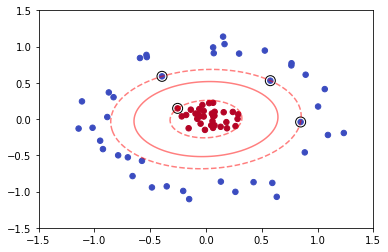

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, 
            s=30, cmap='coolwarm')

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(-1.5, 1.5, 100)
yy = np.linspace(-1.5, 1.5, 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc4.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc4.support_vectors_[:, 0], svc4.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')